<a href="https://colab.research.google.com/github/farsashraf/farsashraf/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import csr_matrix
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import joblib

In [115]:
data = pd.read_csv('yaret.csv')

In [116]:
cols_name = ['age', 'sex', 'city', 'pref_hobby', 'pref_donate', 'donate_type', 'donate_way', 'donate_number', 'income']
data.columns = cols_name

In [117]:
data.drop(['age', 'sex','pref_hobby'], axis = 1, inplace =True)
data.head()

,city,pref_donate,donate_type,donate_way,donate_number,income
0,Kafr El-Sheikh,education,things,online,1,3000
1,Giza,health,time,himself,3,5000
2,the new Valley,Poverty,skills,mobile,2,4000
3,Western,environment,knowledge,email,5,3500
4,Menoufia,health,things,mobile,4,6000


In [118]:
df = data.copy()

In [119]:
df.head()

,city,pref_donate,donate_type,donate_way,donate_number,income
0,Kafr El-Sheikh,education,things,online,1,3000
1,Giza,health,time,himself,3,5000
2,the new Valley,Poverty,skills,mobile,2,4000
3,Western,environment,knowledge,email,5,3500
4,Menoufia,health,things,mobile,4,6000


In [120]:
label_encoder = LabelEncoder()

categorical_columns = [ 'city', 'pref_donate', 'donate_type', 'donate_way', 'donate_number', 'income
']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

import pickle
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
df

,city,pref_donate,donate_type,donate_way,donate_number,income
0,10,1,2,3,0,5
1,8,3,3,1,2,15
2,25,0,1,2,1,12
3,23,2,0,0,4,8
4,13,3,2,2,3,17
...,...,...,...,...,...,...
9994,26,1,3,3,1,13
9995,9,3,0,1,14,30
9996,1,0,2,2,2,32
9997,15,0,1,0,39,34


In [121]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

def elbow_method(data1, max_k):
    means= []
    inertias= []
    for k in range(1, max_k):
      km = KMeans(n_clusters=k)
      km.fit(data1)
      means.append(k)
      inertias.append(km.inertia_)

    fig = plt.subplots(figsize =(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('number of clusters')
    plt.ylabel('inertia')
    plt.grid(True)
    plt.show

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

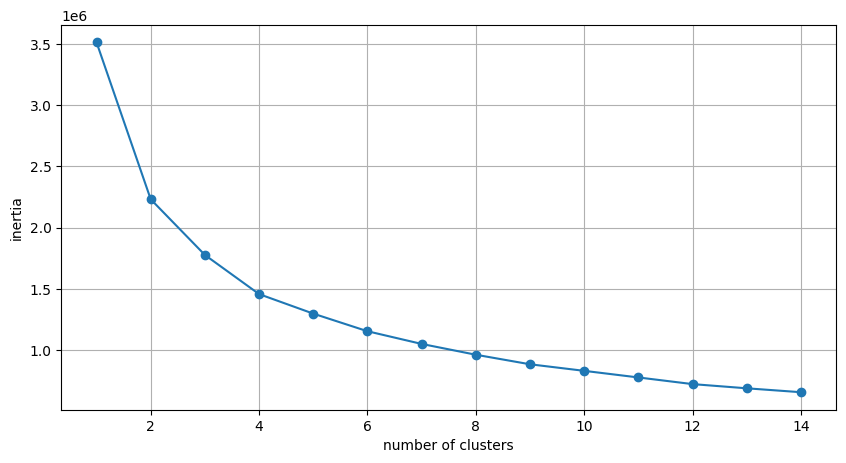

In [122]:
elbow_method(df, 15)

In [123]:
data_plot = data

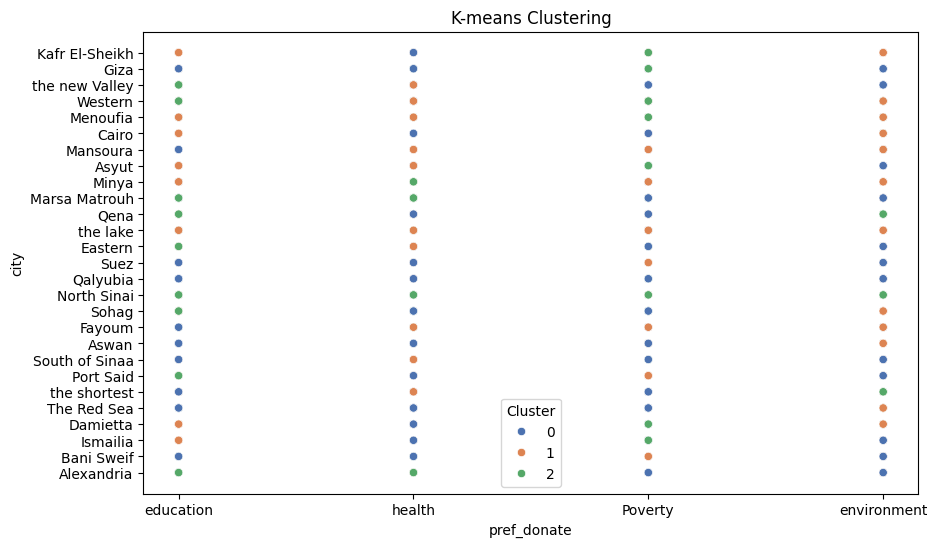

In [124]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10,  max_iter=300, tol=0.0001, random_state=42)
kmeans.fit(df)

data_plot['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_plot, x=data_plot['pref_donate'], y=data_plot['city'], hue='Cluster', palette='deep', legend='full')
plt.title('K-means Clustering')
plt.xlabel('pref_donate')
plt.ylabel('city')
plt.show()

In [125]:
from sklearn.metrics import silhouette_score
result = kmeans.labels_
print(silhouette_score(df, result))

0.2817083044467231


In [126]:
from sklearn.metrics import calinski_harabasz_score
result = kmeans.labels_
print(calinski_harabasz_score(df, result))

4894.776078765505


In [127]:
from sklearn.metrics import davies_bouldin_score
result = kmeans.labels_
print(davies_bouldin_score(df, result))

1.1997729152773677


In [128]:
cluster_data_dict = {}

for cluster_label in set(data_plot['Cluster']):
    cluster_data = data_plot[data_plot['Cluster'] == cluster_label]
    cluster_data_dict[cluster_label] = cluster_data

for cluster_label, cluster_data in cluster_data_dict.items():
    print(f'Cluster {cluster_label} Data:')
    print(cluster_data)

Cluster 0 Data:
                city  pref_donate donate_type donate_way  donate_number  \
0     Kafr El-Sheikh    education      things     online              1   
1               Giza       health        time    himself              3   
2     the new Valley      Poverty      skills     mobile              2   
3            Western  environment   knowledge      email              5   
4           Menoufia       health      things     mobile              4   
...              ...          ...         ...        ...            ...   
9991            Qena       health      skills     mobile             12   
9992           Aswan       health   knowledge    himself             20   
9994    the shortest    education        time     online              2   
9995        Ismailia       health   knowledge    himself             15   
9996           Aswan      Poverty      things     mobile              3   

      income  Cluster  
0       3000        0  
1       5000        0  
2       400

In [129]:
cluster_one = cluster_data_dict[0]
cluster_two = cluster_data_dict[1]
cluster_three = cluster_data_dict[2]
#cluster_four =cluster_data_dict[3]
#cluster_five =cluster_data_dict[4]

In [130]:
def statistic_method(clus_name):
  word_count = clus_name.value_counts()
  print(word_count)

In [131]:
statistic_method(cluster_one['pref_donate'])
print('\n')

statistic_method(cluster_one['donate_type'])

pref_donate
health         1295
education       868
Poverty         627
environment     582
Name: count, dtype: int64


donate_type
things       1031
knowledge     971
skills        852
time          518
Name: count, dtype: int64


In [132]:
statistic_method(cluster_two['pref_donate'])
print('\n')
statistic_method(cluster_two['donate_type'])


pref_donate
health         1594
education      1057
Poverty         777
environment     710
Name: count, dtype: int64


donate_type
things       1221
knowledge    1189
skills       1063
time          665
Name: count, dtype: int64


In [133]:
statistic_method(cluster_three['pref_donate'])
print('\n')
statistic_method(cluster_three['donate_type'])

pref_donate
health         968
education      633
Poverty        457
environment    431
Name: count, dtype: int64


donate_type
things       734
knowledge    708
skills       643
time         404
Name: count, dtype: int64


In [134]:
user_data =[[30, 'm', 'Mansoura', 'sports', 'health', 'time', 'online', '9', 3500]]
new_df = pd.DataFrame(user_data)
new_df.head()


,0,1,2,3,4,5,6,7,8
0,30,m,Mansoura,sports,health,time,online,9,3500


In [135]:
cols_name_new = ['age', 'sex', 'city', 'pref_hobby', 'pref_donate', 'donate_type', 'donate_way', 'donate_number', 'income']
new_df.columns = cols_name_new
new_df.head()

,age,sex,city,pref_hobby,pref_donate,donate_type,donate_way,donate_number,income
0,30,m,Mansoura,sports,health,time,online,9,3500


In [136]:
new_df.drop(['age', 'sex','pref_hobby'], axis = 1, inplace =True)
new_df.head()

,city,pref_donate,donate_type,donate_way,donate_number,income
0,Mansoura,health,time,online,9,3500


In [137]:
with open('label_encoder.pkl', 'rb') as f:
    loaded_encoder = joblib.load(f)
    loaded_encoder

In [138]:
new_df_array = np.array(new_df)

In [139]:
new_df_flattened = new_df_array.flatten()

In [140]:
print(new_df_flattened.dtype)

object


In [141]:
new_df_flattened = new_df_flattened.astype(str)

In [142]:
ndata_encoder = loaded_encoder.fit_transform(new_df_flattened)
ndata_encoder

array([2, 3, 5, 4, 1, 0])